```
[Title] Generalized Reduced Gradient Algorithm
[Author] Ishank Arora
[References]
 - https://raw.githubusercontent.com/ishank011/grgdescent/master/reduced_gradient.py
```

In [7]:
# Generalized Reduced Gradient Algorithm 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

def generalized_reduced_gradient():

	x1, x2, x3 = symbols('x1 x2 x3')
	xvars = [x1, x2, x3]

	fx = 4 * x1 - x2 ** 2 + x3 ** 2 - 12				# Function to be minimized
	hxs = [20 - x1 ** 2 - x2 ** 2, x1 + x3 - 7]			# Constraints to be obeyed
	alpha_0 = 1											# Parameter initializations
	gamma = 0.4
	max_iter = 100
	max_outer_iter = 50
	eps_1, eps_2, eps_3 = 0.001, 0.001, 0.001

	xcurr = np.array([2, 4, 5])							# Starting solution

	dfx = np.array([diff(fx, xvar) for xvar in xvars])
	dhxs = np.array([[diff(hx, xvar) for xvar in xvars] for hx in hxs])
	nonbasic_vars = len(xvars) - len(hxs)
	opt_sols = []

	for outer_iter in range(max_outer_iter):

		print('\n\nOuter loop iteration: {0}, optimal solution: {1}'.format(outer_iter + 1, xcurr))
		opt_sols.append(fx.subs(zip(xvars, xcurr)))

		# Step 1

		delta_f = np.array([df.subs(zip(xvars, xcurr)) for df in dfx])
		delta_h = np.array([[dh.subs(zip(xvars, xcurr)) for dh in dhx] for dhx in dhxs])		# Value of h'_i(xcurr) for all i
		J = np.array([dhx[nonbasic_vars:] for dhx in delta_h])									# Computation of J and C matrices
		C = np.array([dhx[:nonbasic_vars] for dhx in delta_h])
		delta_f_bar = delta_f[nonbasic_vars:]
		delta_f_cap = delta_f[:nonbasic_vars]

		J_inv = np.linalg.inv(np.array(J, dtype=float))
		delta_f_tilde = delta_f_cap - delta_f_bar.dot(J_inv.dot(C))

		# Step 2

		if abs(delta_f_tilde[0]) <= eps_1:
			break

		d_bar = - delta_f_tilde.T 									# Direction of search in current iteration
		d_cap = - J_inv.dot(C.dot(d_bar))
		d = np.concatenate((d_bar, d_cap)).T

		# Step 3

		alpha = alpha_0

		while alpha > 0.001:

			print('\nAlpha value: {0}\n'.format(alpha))

			# Step 3(a)

			v = xcurr.T + alpha * d
			v_bar = v[:nonbasic_vars]
			v_cap = v[nonbasic_vars:]
			flag = False

			for iter in range(max_iter):
				print('Iteration: {0}, optimal solution obtained at x = {1}'.format(iter + 1, v))
				h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
				if all([abs(h_i) < eps_2 for h_i in h]):				# Check if candidate satisfies all constraints
					if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
						alpha = alpha * gamma
						break
					else:
						xcurr = v 						# Obtained a candidate better than the current optimal solution
						flag = True
						break

				# Step 3(b)

				delta_h_v = np.array([[dh.subs(zip(xvars, v)) for dh in dhx] for dhx in dhxs])
				J_inv_v = np.linalg.inv(np.array([dhx[nonbasic_vars:] for dhx in delta_h_v], dtype=float))
				v_next_cap = v_cap - J_inv_v.dot(h)

				# Step 3(c)

				if abs(np.linalg.norm(np.array(v_cap - v_next_cap, dtype=float), 1)) > eps_3:
					v_cap = v_next_cap
					v = np.concatenate((v_bar, v_cap))
				else:
					v_cap = v_next_cap
					v = np.concatenate((v_bar, v_cap))
					h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
					if all([abs(h_i) < eps_2 for h_i in h]):

						# Step 3(d)

						if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
							alpha = alpha * gamma				# Search for lower values of alpha
							break
						else:
							xcurr = v
							flag = True
							break
					else:
						alpha = alpha * gamma
						break
			
			if flag == True:
				break

	print('\n\nFinal solution obtained is: {0}'.format(xcurr))
	print('Value of the function at this point: {0}\n'.format(fx.subs(zip(xvars, xcurr))))

	plt.plot(opt_sols, 'ro')								# Plot the solutions obtained after every iteration
	plt.show()





Outer loop iteration: 1, optimal solution: [2 4 5]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [4.00000000000000 3.00000000000000 3.00000000000000]
Iteration: 2, optimal solution obtained at x = [4.00000000000000 2.16666666666667 3.00000000000000]
Iteration: 3, optimal solution obtained at x = [4.00000000000000 2.00641025641026 3.00000000000000]
Iteration: 4, optimal solution obtained at x = [4.00000000000000 2.00001024002621 3.00000000000000]

Alpha value: 0.4

Iteration: 1, optimal solution obtained at x = [2.80000000000000 3.60000000000000 4.20000000000000]
Iteration: 2, optimal solution obtained at x = [2.80000000000000 3.48888888888889 4.20000000000000]
Iteration: 3, optimal solution obtained at x = [2.80000000000000 3.48711960368011 4.20000000000000]


Outer loop iteration: 2, optimal solution: [2.80000000000000 3.48711960368011 4.20000000000000]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [1.60000000000000 4.45066556191282 5.400000000000


Iteration: 1, optimal solution obtained at x = [2.50054025786367 3.70786994967864 4.49945974213633]

Alpha value: 0.06400000000000002

Iteration: 1, optimal solution obtained at x = [2.50111653291825 3.70748109988393 4.49888346708175]

Alpha value: 0.025600000000000008

Iteration: 1, optimal solution obtained at x = [2.50134704294008 3.70732555996605 4.49865295705992]


Outer loop iteration: 17, optimal solution: [2.50134704294008 3.70732555996605 4.49865295705992]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [2.49595887117977 3.71096098050884 4.50404112882024]

Alpha value: 0.4

Iteration: 1, optimal solution obtained at x = [2.49919177423595 3.70877972818316 4.50080822576405]

Alpha value: 0.16000000000000003

Iteration: 1, optimal solution obtained at x = [2.50048493545843 3.70790722725289 4.49951506454157]

Alpha value: 0.06400000000000002

Iteration: 1, optimal solution obtained at x = [2.50100219994742 3.70755822688079 4.49899780005258]

Alpha value: 0.0256000


Alpha value: 0.0016384000000000008

Iteration: 1, optimal solution obtained at x = [2.50074847031155 3.70772937095436 4.49925152968845]


Outer loop iteration: 27, optimal solution: [2.50075340784520 3.70772604073147 4.49924659215480]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [2.49773977646440 3.70975864747284 4.50226022353560]

Alpha value: 0.4

Iteration: 1, optimal solution obtained at x = [2.49954795529288 3.70853908342802 4.50045204470712]

Alpha value: 0.16000000000000003

Iteration: 1, optimal solution obtained at x = [2.50027122682427 3.70805125781009 4.49972877317573]

Alpha value: 0.06400000000000002

Iteration: 1, optimal solution obtained at x = [2.50056053543683 3.70785612756292 4.49943946456317]

Alpha value: 0.025600000000000008

Iteration: 1, optimal solution obtained at x = [2.50067625888185 3.70777807546405 4.49932374111815]

Alpha value: 0.010240000000000004

Iteration: 1, optimal solution obtained at x = [2.50072254825986 3.70774685462451 4.49


Iteration: 1, optimal solution obtained at x = [2.49954795529288 3.70853908342802 4.50045204470712]

Alpha value: 0.16000000000000003

Iteration: 1, optimal solution obtained at x = [2.50027122682427 3.70805125781009 4.49972877317573]

Alpha value: 0.06400000000000002

Iteration: 1, optimal solution obtained at x = [2.50056053543683 3.70785612756292 4.49943946456317]

Alpha value: 0.025600000000000008

Iteration: 1, optimal solution obtained at x = [2.50067625888185 3.70777807546405 4.49932374111815]

Alpha value: 0.010240000000000004

Iteration: 1, optimal solution obtained at x = [2.50072254825986 3.70774685462451 4.49927745174014]

Alpha value: 0.0040960000000000015

Iteration: 1, optimal solution obtained at x = [2.50074106401106 3.70773436628869 4.49925893598894]

Alpha value: 0.0016384000000000008

Iteration: 1, optimal solution obtained at x = [2.50074847031155 3.70772937095436 4.49925152968845]


Outer loop iteration: 37, optimal solution: [2.50075340784520 3.70772604073147 4.


Iteration: 1, optimal solution obtained at x = [2.50056053543683 3.70785612756292 4.49943946456317]

Alpha value: 0.025600000000000008

Iteration: 1, optimal solution obtained at x = [2.50067625888185 3.70777807546405 4.49932374111815]

Alpha value: 0.010240000000000004

Iteration: 1, optimal solution obtained at x = [2.50072254825986 3.70774685462451 4.49927745174014]

Alpha value: 0.0040960000000000015

Iteration: 1, optimal solution obtained at x = [2.50074106401106 3.70773436628869 4.49925893598894]

Alpha value: 0.0016384000000000008

Iteration: 1, optimal solution obtained at x = [2.50074847031155 3.70772937095436 4.49925152968845]


Outer loop iteration: 46, optimal solution: [2.50075340784520 3.70772604073147 4.49924659215480]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [2.49773977646440 3.70975864747284 4.50226022353560]

Alpha value: 0.4

Iteration: 1, optimal solution obtained at x = [2.49954795529288 3.70853908342802 4.50045204470712]

Alpha value: 0.16

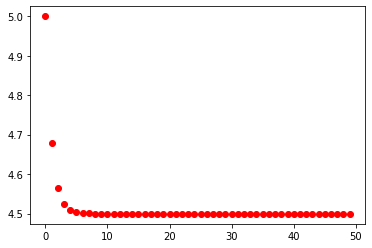

In [8]:
if __name__ == '__main__':
	generalized_reduced_gradient()